# Stock Price Prediction Project

## 1. Project Concept and Scope
### Objective
To predict future stock prices of specific companies representing different market sectors, using historical data.

### Scope
The project will focus on PLUG (Energy), NIO (Automotive), NTLA (Healthcare), SNAP (Communication Services), and CHPT (Industrials).

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

# Overview of Selected Stocks

This notebook provides an overview of five distinct stocks, each representing different sectors and industries. The stocks covered are:

1. **PLUG (Plug Power Inc.)**: 
   - Sector: Energy
   - Industry: Electrical Equipment & Parts
   - Description: Plug Power is an innovator in hydrogen and fuel cell technology, providing comprehensive hydrogen fuel cell turnkey solutions.

2. **NIO (NIO Inc.)**:
   - Sector: Automotive
   - Industry: Auto Manufacturers
   - Description: NIO is a pioneer in China's premium electric vehicle market, specializing in designing, manufacturing, and selling electric vehicles.

3. **NTLA (Intellia Therapeutics Inc.)**:
   - Sector: Healthcare
   - Industry: Biotechnology
   - Description: Intellia Therapeutics is a leading biotechnology company developing therapies using a CRISPR/Cas9 gene-editing system.

4. **SNAP (Snap Inc.)**:
   - Sector: Communication Services
   - Industry: Internet Content & Information
   - Description: Snap Inc. is the parent company of Snapchat, a popular social media platform known for its ephemeral messaging and multimedia features.

5. **CHPT (ChargePoint Holdings Inc.)**:
   - Sector: Industrials
   - Industry: Specialty Industrial Machinery
   - Description: ChargePoint Holdings is at the forefront of electric vehicle charging infrastructure, offering a comprehensive array of charging solutions.

Each of these companies represents a unique investment opportunity within its respective sector, reflecting different aspects of technological and industrial advancement.


## 2. Data Collection
- Utilize Alpha Vantage API for historical stock price data.
- Gather comprehensive data including prices, volumes, and market indicators.

In [44]:
"""
This script imports necessary libraries for stock price prediction.
"""
import os
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']

In [13]:
def retrieve_stock_data(symbols):
    """
    Retrieve historical stock data for a given list of symbols using Alpha Vantage API.
    Deletes old CSV files if newer data is found and downloaded.

    Parameters:
    symbols (list): A list of stock symbols to retrieve data for.

    Returns:
    None
    """
    # Read the API key from the file
    with open('AlphaVantage.txt', 'r') as file:
        api_key = file.read().strip()

    # Create a TimeSeries object with your API key
    ts = TimeSeries(key=api_key, output_format='pandas')

    # Loop through the symbols and retrieve the historical data
    for symbol in symbols:
        # Get the historical data for the symbol
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        
        # Sort the data by index (date) just in case
        data.sort_index(inplace=True)

        # Get the first and last dates
        first_date = data.index[0].strftime('%Y-%m-%d')
        last_date = data.index[-1].strftime('%Y-%m-%d')

        # Generate the new file name
        new_file_name = f'{first_date}_{last_date}_{symbol}_historical_data.csv'

        # Check if a file for this symbol already exists
        existing_files = [f for f in os.listdir() if f.endswith(f'{symbol}_historical_data.csv')]
        if existing_files:
            # Sort files to find the most recent one
            existing_files.sort()
            most_recent_file = existing_files[-1]

            # Extract dates from the most recent file name
            existing_first_date, existing_last_date, *_ = most_recent_file.split('_')

            # Compare dates (strings comparison works because of the YYYY-MM-DD format)
            if existing_first_date <= first_date and existing_last_date >= last_date:
                print(f"Data already up-to-date for {symbol}")
                continue
            else:
                # Remove older files
                for file in existing_files:
                    os.remove(file)
                    print(f"Old file {file} deleted for {symbol}")

        # Save the new data to a CSV file
        data.to_csv(new_file_name)
        print(f"New data saved for {symbol}: {new_file_name}")

# Example usage
retrieve_stock_data(symbols_list)


Data already up-to-date for PLUG


ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [46]:
import glob
import pandas as pd

def load_stock_data(symbols):
    """
    Load the most recent, up-to-date historical data CSV files into variables.
    The 'Date' column in each CSV file is used as the DataFrame index and parsed as dates.

    Parameters:
    symbols (list): A list of stock symbols to load data for.

    Returns:
    dict: A dictionary containing the loaded data frames, with stock symbols as keys.
    """
    data_frames = {}

    for symbol in symbols:
        # Find the most recent CSV file for the symbol
        files = glob.glob(f'*{symbol}_historical_data.csv')
        if files:
            files.sort()
            most_recent_file = files[-1]

            # Load the CSV file into a data frame with 'Date' as the index column and parse dates
            data_frames[symbol] = pd.read_csv(most_recent_file, index_col='date', parse_dates=['date'])
            print(f"Data loaded for {symbol}: {most_recent_file}")
        else:
            print(f"No data found for {symbol}")

    return data_frames

# Example usage
# symbols_list should be defined earlier in your script
# e.g., symbols_list = ['AAPL', 'GOOGL', 'MSFT']
stock_data = load_stock_data(symbols_list)


Data loaded for PLUG: 1999-11-01_2024-01-22_PLUG_historical_data.csv
Data loaded for NIO: 2018-09-12_2024-01-22_NIO_historical_data.csv
Data loaded for NTLA: 2016-05-06_2024-01-22_NTLA_historical_data.csv
Data loaded for SNAP: 2017-03-02_2024-01-22_SNAP_historical_data.csv
Data loaded for CHPT: 2019-09-16_2024-01-22_CHPT_historical_data.csv


### Looking at the heads of our data

In [5]:
stock_data['PLUG'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,16.75,16.75,15.00,16.00,1506000.0
1999-11-02,16.44,20.00,16.38,17.88,1701000.0
1999-11-03,18.88,19.31,18.13,18.63,683000.0
1999-11-04,19.44,19.88,18.63,19.06,480000.0
1999-11-05,19.09,19.50,17.38,17.38,489000.0


In [5]:
stock_data['NIO'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-09-12,6.00,6.93,5.35,6.60,66848996.0
2018-09-13,6.62,12.69,6.52,11.60,158346488.0
2018-09-14,12.66,13.80,9.22,9.90,172473559.0
2018-09-17,9.61,9.75,8.50,8.50,56323875.0
2018-09-18,8.73,9.10,7.67,7.68,41827593.0


In [6]:
stock_data['NTLA'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2016-05-06,22.00,24.0000,21.00,22.10,5025236.0
2016-05-09,22.90,24.2400,22.70,24.00,778138.0
2016-05-10,24.58,26.0000,24.50,25.75,658353.0
2016-05-11,26.10,26.2500,25.06,25.25,377679.0
2016-05-12,25.29,25.9999,23.54,23.54,588352.0


In [7]:
stock_data['SNAP'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2017-03-02,24.00,26.05,23.50,24.48,217109769.0
2017-03-03,26.39,29.44,26.06,27.09,148227379.0
2017-03-06,28.17,28.25,23.77,23.77,72938848.0
2017-03-07,22.21,22.50,20.64,21.44,71899652.0
2017-03-08,22.03,23.43,21.31,22.81,49834423.0


In [47]:
stock_data['CHPT'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-09-16,9.65,9.76,9.65,9.76,600.0
2019-09-17,9.76,9.76,9.76,9.76,0.0
2019-09-18,9.69,9.72,9.69,9.72,200.0
2019-09-19,9.72,9.72,9.72,9.72,0.0
2019-09-20,9.84,9.85,9.84,9.85,911.0


In [70]:
stock_data['PLUG']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,15.660512,16.193709,15.075111,15.639910,2.099655e+07
std,13.438472,13.935963,12.869044,13.417071,1.671550e+07
min,1.240000,1.330000,1.230000,1.260000,9.606340e+05
25%,4.075000,4.200000,3.890000,4.090000,1.146950e+07
50%,12.495000,12.922500,12.044950,12.365000,1.797068e+07
75%,25.087250,25.882850,24.321250,25.070000,2.629766e+07
max,70.300000,75.490000,67.260000,73.180000,2.233952e+08


In [10]:
stock_data['PLUG'].columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [11]:
stock_data['PLUG'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6094 entries, 1999-11-01 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6094 non-null   float64
 1   2. high    6094 non-null   float64
 2   3. low     6094 non-null   float64
 3   4. close   6094 non-null   float64
 4   5. volume  6094 non-null   float64
dtypes: float64(5)
memory usage: 285.7 KB


In [12]:
# Check for missing values

stock_data['PLUG'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [73]:
stock_data['NIO']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,17.819223,18.368345,17.213301,17.802150,6.465912e+07
std,15.379498,15.816552,14.853561,15.350569,5.665798e+07
min,1.190000,1.450000,1.190000,1.320000,5.111018e+06
25%,6.182500,6.415000,6.000000,6.260000,3.404982e+07
50%,11.050000,11.405000,10.700000,11.040000,5.036712e+07
75%,26.757500,27.590000,25.842500,27.207500,7.491192e+07
max,64.950000,66.990000,62.190000,62.840000,5.790699e+08


In [75]:
stock_data['NIO'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2018-09-12 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1348 non-null   float64
 1   2. high    1348 non-null   float64
 2   3. low     1348 non-null   float64
 3   4. close   1348 non-null   float64
 4   5. volume  1348 non-null   float64
dtypes: float64(5)
memory usage: 95.5 KB


In [15]:
stock_data['NIO'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [76]:
stock_data['NTLA']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,48.032153,49.723235,46.377124,47.988726,1.052773e+06
std,37.874692,39.361097,36.536238,37.838068,1.085944e+06
min,9.740000,10.220000,9.180000,9.440000,1.980850e+05
25%,17.327500,17.714625,16.945000,17.360000,6.071222e+05
50%,37.965000,38.755000,37.070000,37.990000,8.705385e+05
75%,63.550000,66.013600,61.132500,63.667500,1.233653e+06
max,175.700000,202.730000,170.400000,176.780000,2.319367e+07


In [18]:
stock_data['NTLA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1940 entries, 2016-05-06 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1940 non-null   float64
 1   2. high    1940 non-null   float64
 2   3. low     1940 non-null   float64
 3   4. close   1940 non-null   float64
 4   5. volume  1940 non-null   float64
dtypes: float64(5)
memory usage: 90.9 KB


In [19]:
stock_data['NTLA'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [77]:
stock_data['SNAP']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,25.896834,26.545199,25.235199,25.900385,2.980022e+07
std,20.317797,20.790983,19.769454,20.285019,2.679371e+07
min,5.380000,5.840000,5.350000,5.640000,6.311184e+06
25%,10.870000,11.220000,10.667500,10.910000,1.759844e+07
50%,15.635000,16.072500,15.452500,15.755000,2.295569e+07
75%,38.870000,40.193125,37.595000,38.850000,3.221922e+07
max,82.000000,83.340000,79.320000,83.110000,3.309939e+08


In [17]:
stock_data['SNAP'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2017-03-02 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1734 non-null   float64
 1   2. high    1734 non-null   float64
 2   3. low     1734 non-null   float64
 3   4. close   1734 non-null   float64
 4   5. volume  1734 non-null   float64
dtypes: float64(5)
memory usage: 81.3 KB


In [19]:
stock_data['SNAP'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [78]:
stock_data['CHPT']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1095.00000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,14.95773,15.396813,14.448195,14.915188,7.418417e+06
std,8.87972,9.250031,8.398263,8.821867,7.428137e+06
min,1.64000,1.760000,1.560000,1.650000,0.000000e+00
25%,9.75000,9.780000,9.720000,9.750000,1.992494e+06
50%,11.86000,12.220000,11.390000,11.930000,7.015886e+06
75%,19.21000,19.930000,18.730000,19.320000,1.034642e+07
max,49.08000,49.480000,45.124700,46.100000,1.022657e+08


In [35]:
stock_data['CHPT'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-09-16 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1095 non-null   float64
 1   2. high    1095 non-null   float64
 2   3. low     1095 non-null   float64
 3   4. close   1095 non-null   float64
 4   5. volume  1095 non-null   float64
dtypes: float64(5)
memory usage: 83.6 KB


In [48]:
stock_data['CHPT'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [81]:
fig = px.line(stock_data['PLUG'], x=stock_data['PLUG'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

In [82]:
fig = px.line(stock_data['PLUG']['2019':'2024'], x=stock_data['PLUG']['2019':'2024'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

In [64]:
"""
Create a histogram plot of the closing price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='4. close', 
    marginal='box',
    nbins=200,
    title='PLUG Closing Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
"""
Create a histogram plot of the closing price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='1. open', 
    marginal='box',
    color_discrete_sequence=['red'],
    nbins=200,
    title='PLUG Opening Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.scatter(stock_data['PLUG'], 
                 x='1. open', 
                 y='4. close', 
                 opacity=0.8,
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

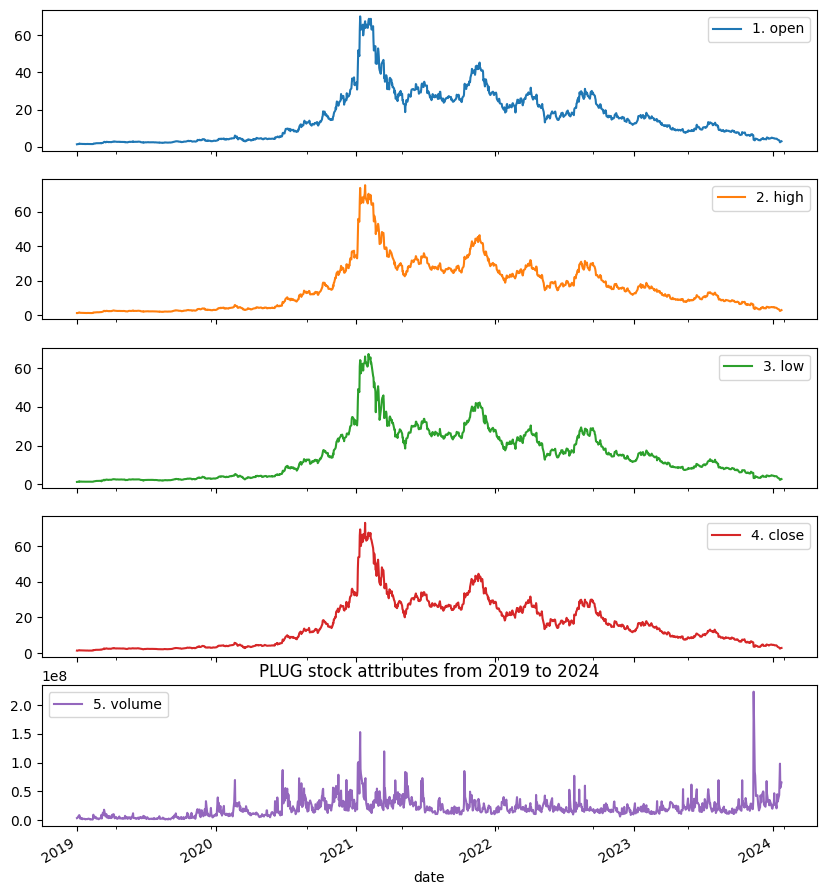

In [61]:
stock_data['PLUG']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('PLUG stock attributes from 2019 to 2024')
plt.show()

In [63]:
stock_data['PLUG'].corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.997623,0.998476,0.996389,0.200354
2. high,0.997623,1.000000,0.997397,0.998824,0.201650
3. low,0.998476,0.997397,1.000000,0.998034,0.203457
4. close,0.996389,0.998824,0.998034,1.000000,0.205657
5. volume,0.200354,0.201650,0.203457,0.205657,1.000000


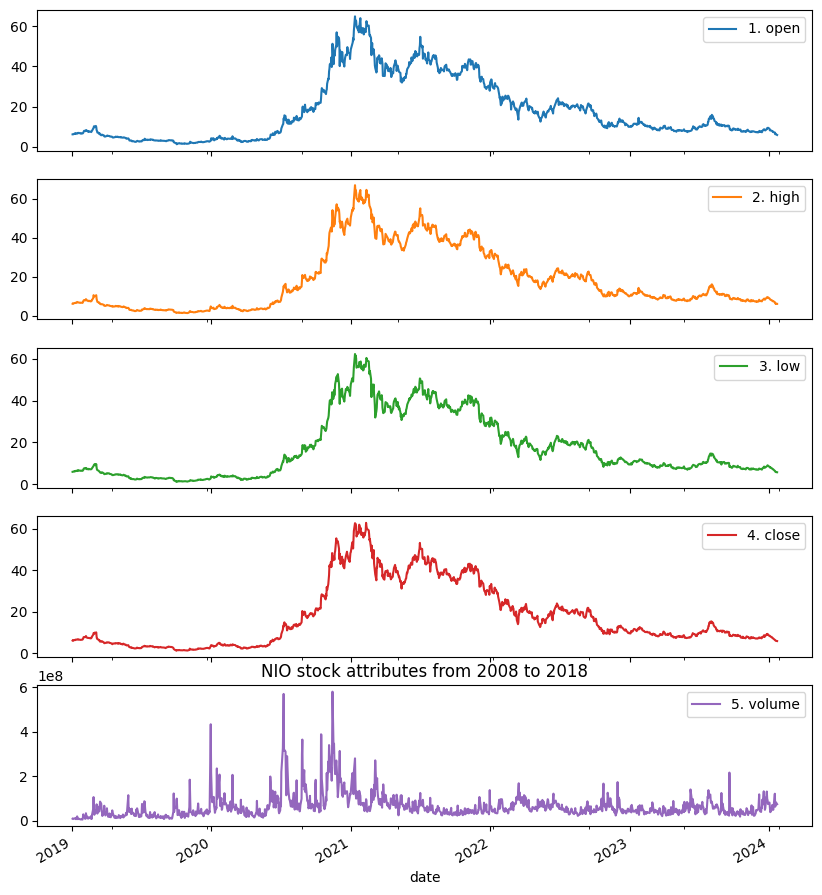

In [56]:
stock_data['NIO']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NIO stock attributes from 2019 to 2024')
plt.show()

In [57]:
stock_data['NIO'].corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.999110,0.998883,0.997833,0.318023
2. high,0.999110,1.000000,0.998696,0.999144,0.334582
3. low,0.998883,0.998696,1.000000,0.998940,0.304088
4. close,0.997833,0.999144,0.998940,1.000000,0.323885
5. volume,0.318023,0.334582,0.304088,0.323885,1.000000


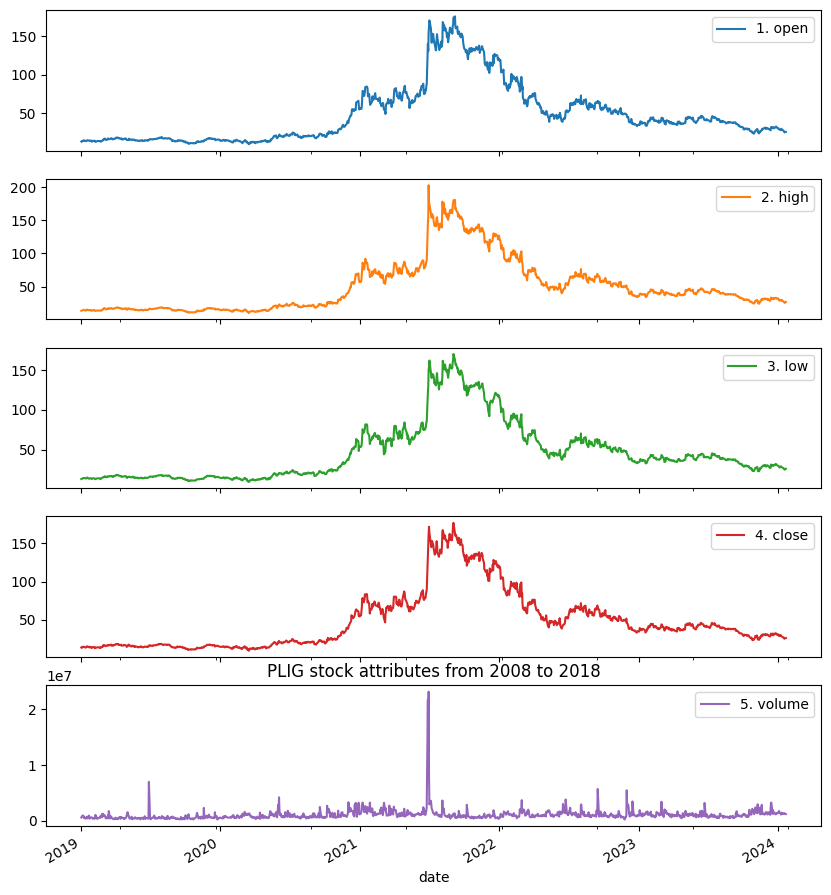

In [58]:
stock_data['NTLA']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NTLA stock attributes from 2019 to 2024')
plt.show()

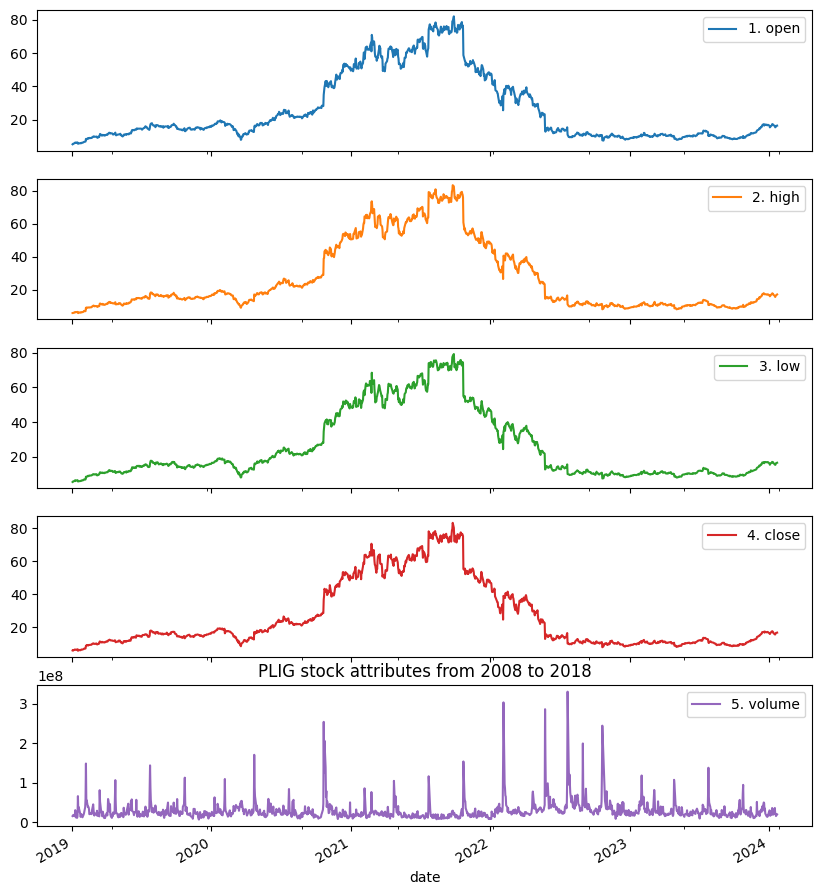

In [59]:
stock_data['SNAP']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('SNAP stock attributes from 2019 to 2024')
plt.show()

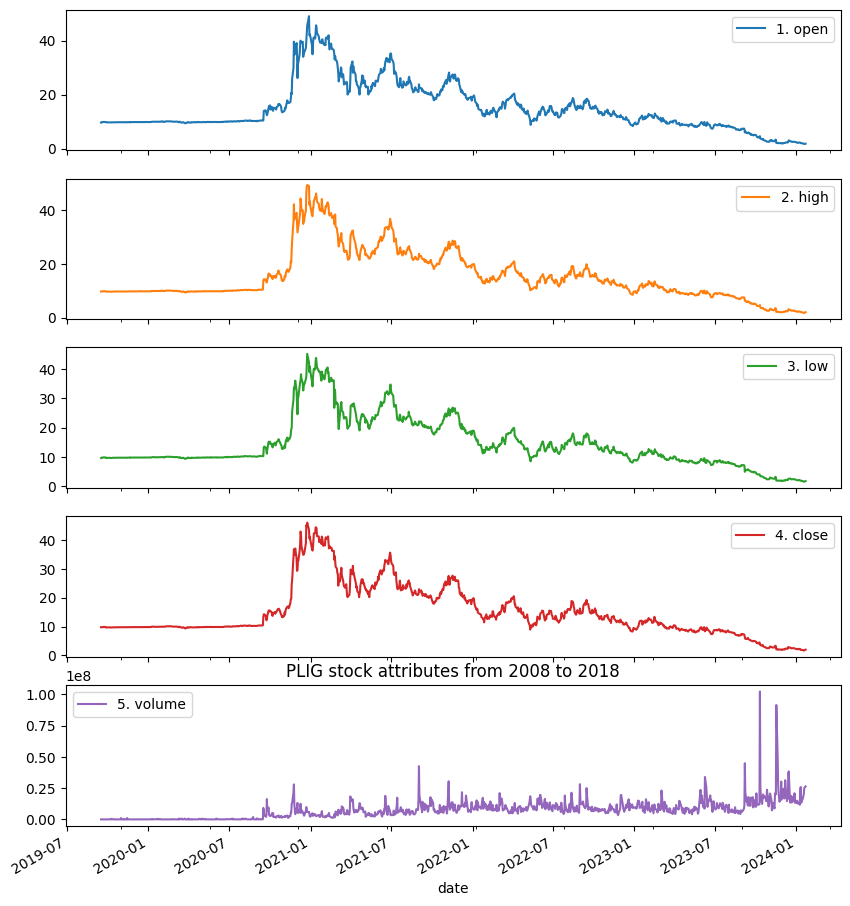

In [60]:
stock_data['CHPT']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('CHPT stock attributes from 2019 to 2024')
plt.show()

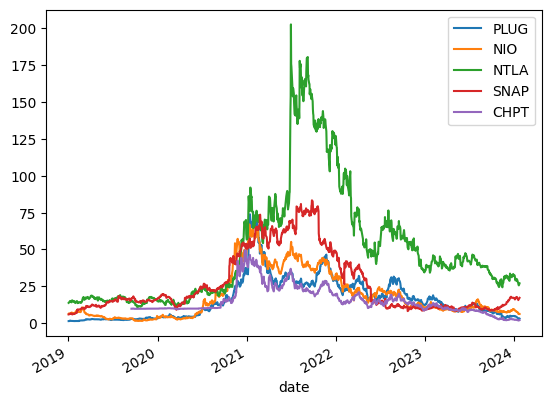

In [88]:
# Plotting before normalization
# symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']


stock_data['PLUG']['2019':'2024']['2. high'].plot()
stock_data['NIO']['2019':'2024']['2. high'].plot()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
stock_data['CHPT']['2019':'2024']['2. high'].plot()
plt.legend(['PLUG','NIO','NTLA','SNAP','CHPT'])
plt.show()
